#### Import libraries

In [1]:
import xarray as xr 
import matplotlib.pyplot as plt
from os import path

#### Read the dataset 

In [2]:
import os

current_path = os.getcwd()
print("Current Path:", current_path)

Current Path: /home/kevin/Escritorio/Kevin/workspace/CRAI_hourly_infilling/WindData_Preprocessing/2.-Mask_creation


In [30]:
path = '/home/kevin/Escritorio/Kevin/workspace/CRAI_hourly_infilling/WindData_Preprocessing/'
path_in = '1.-AEMET/CERRA/'
name_infile = 'AEMET_CERRA_WS_ms_10m_1961_2022.nc'
path_out = '3.-data_with_NAN_values_corrected/CERRA/'

ds = xr.open_dataset(path + path_in + name_infile)

In [5]:
ds

<xarray.Dataset> Size: 11GB
Dimensions:  (time: 22645, y: 250, x: 250)
Coordinates:
  * time     (time) datetime64[ns] 181kB 1961-01-01 1961-01-02 ... 2022-12-31
  * y        (y) float64 2kB -1.727e+06 -1.722e+06 ... -3.63e+05 -3.575e+05
  * x        (x) float64 2kB -1.617e+06 -1.612e+06 ... -2.53e+05 -2.475e+05
Data variables:
    ws       (time, y, x) float64 11GB ...

#### Information of the dataset

In [6]:
print(ds)

<xarray.Dataset> Size: 11GB
Dimensions:  (time: 22645, y: 250, x: 250)
Coordinates:
  * time     (time) datetime64[ns] 181kB 1961-01-01 1961-01-02 ... 2022-12-31
  * y        (y) float64 2kB -1.727e+06 -1.722e+06 ... -3.63e+05 -3.575e+05
  * x        (x) float64 2kB -1.617e+06 -1.612e+06 ... -2.53e+05 -2.475e+05
Data variables:
    ws       (time, y, x) float64 11GB ...


In [7]:
print('Min Lon: ', ds.x.min().item())
print('Max Lon: ', ds.x.max().item())
print('Min Lat: ', ds.y.min().item())
print('Max Lat: ', ds.y.max().item())


Min Lon:  -1617000.0450800695
Max Lon:  -247500.04508006945
Min Lat:  -1727000.0094558797
Max Lat:  -357500.0094558797


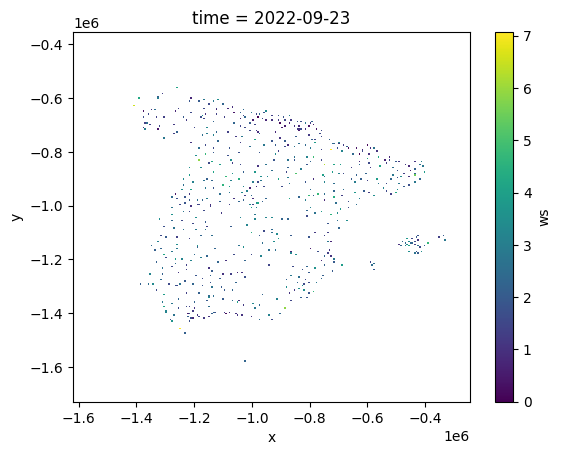

In [8]:
ds['ws'].isel(time=-100).plot()

In [9]:
ds['ws']

<xarray.DataArray 'ws' (time: 22645, y: 250, x: 250)> Size: 11GB
[1415312500 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 181kB 1961-01-01 1961-01-02 ... 2022-12-31
  * y        (y) float64 2kB -1.727e+06 -1.722e+06 ... -3.63e+05 -3.575e+05
  * x        (x) float64 2kB -1.617e+06 -1.612e+06 ... -2.53e+05 -2.475e+05
Attributes:
    Dataset:  AEMET
    Version:  postclimatol-AEMET
    Creator:  NuriaPPlaza
    Date:     2025-04-09

#### Split the data (in time) set to make it manageable

In [10]:
ds = ds.sel(time=slice("2010-01-01", "2022-12-31"))

In [11]:
print(ds)

<xarray.Dataset> Size: 2GB
Dimensions:  (time: 4748, y: 250, x: 250)
Coordinates:
  * time     (time) datetime64[ns] 38kB 2010-01-01 2010-01-02 ... 2022-12-31
  * y        (y) float64 2kB -1.727e+06 -1.722e+06 ... -3.63e+05 -3.575e+05
  * x        (x) float64 2kB -1.617e+06 -1.612e+06 ... -2.53e+05 -2.475e+05
Data variables:
    ws       (time, y, x) float64 2GB ...


In [12]:
print('Max ws value: ', ds["ws"].max().item())
print('Min ws value: ', ds["ws"].min().item())

Max ws value:  31.066666666666666
Min ws value:  0.0


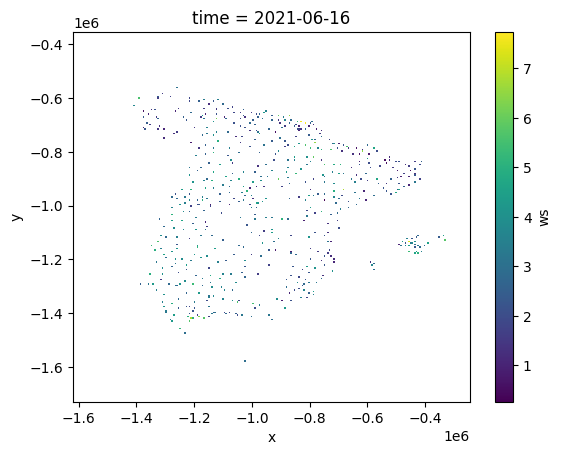

In [13]:
ds.isel(time=-564)["ws"].plot()

In [14]:
ds['ws']

<xarray.DataArray 'ws' (time: 4748, y: 250, x: 250)> Size: 2GB
array([[[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       ...,

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]]], shape=(4748, 250, 250))
Coordinates:
  * time     (time) datetime64[ns] 38kB 2010-01-01 2010-01-02 ... 2022-12-31
  * y        (y) float64 2kB -1.727e+06 -1.722e+06 ... -3.63e+05 -3.575e+05
  * x        (x) float64 2kB -1.617e+06 -1.612e+06 ... -2.53e+05 -2.475e+05
Attributes:
    Dataset:  AEMET
    Version:  postclimatol-AEMET
    Creator:  NuriaPPlaza
    Date:     2025-04-09

#### Check for Nan values

In [15]:
ws_data = ds["ws"]

In [16]:
#print("ws_data: ", ws_data.count()) -> Count non-null values
print("ws_data: ", (ws_data.shape[0] * ws_data.shape[1] * ws_data.shape[2]))
print("NULL ws_data: ", ws_data.isnull().sum().item())
print("Non-null ws_data: ", ws_data.count().item())
print("Non-null ws_data: ", (ws_data.shape[0] * ws_data.shape[1] * ws_data.shape[2]) - ws_data.isnull().sum().item())
print()
print("Rate: ")
print("Null ws_data", (ws_data.isnull().sum() * 100 / (ws_data.shape[0] * ws_data.shape[1] * ws_data.shape[2])).item())
print("Non-null ws_data: ", (ws_data.count() *  100 / (ws_data.shape[0] * ws_data.shape[1] * ws_data.shape[2])).item())

#ws_data_cleaned = ws_data.where(ws_data.isnull()==False, 0)

ws_data:  296750000
NULL ws_data:  293988296
Non-null ws_data:  2761704
Non-null ws_data:  2761704

Rate: 
Null ws_data 99.069349957877
Non-null ws_data:  0.9306500421229992


In [ ]:
ws_data:  231436800
NULL ws_data:  229288777
Non-null ws_data:  2148023
Non-null ws_data:  2148023

Rate: 
Null ws_data 99.07187491358331
Non-null ws_data:  0.9281250864166805

#### Mask Preparation

In [17]:
Mask = ds.where(ds["ws"].isnull()==True, 1)
Mask = Mask.where(Mask["ws"].isnull()==False, 0) #Mask[Mask["windspeed"] != 1] = 0
Mask = Mask.rename({"ws": "mask"})
Mask = Mask.astype("float32")

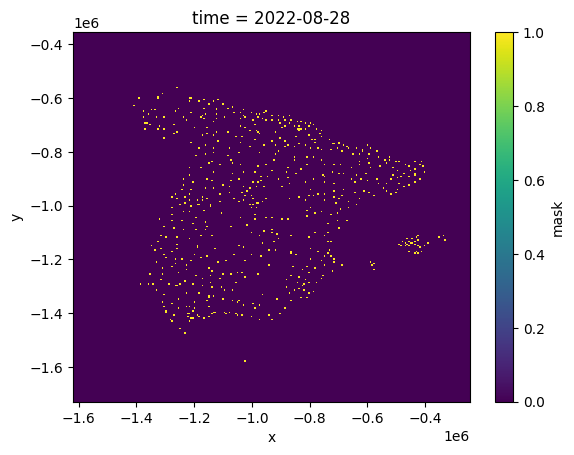

In [18]:
Mask.isel(time=-126)["mask"].plot()

In [19]:
Mask['mask']

<xarray.DataArray 'mask' (time: 4748, y: 250, x: 250)> Size: 1GB
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
...
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]],
      shape=(4748, 250, 250), dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 38kB 2010-01-01 2010-01-02 ... 2022-12-31
  * y        (y) float64 2kB -1.727e+06 -1.722e+06 ... -3.63e+05 -3.575e+05
  * x        (x) float64 2kB -1.617e+06 -1.612e+06 ... -2.53e+05 -2.475e+05
Attributes:
    Dataset:  AEMET
    Version:  postclimatol-AEMET
    Creator:  NuriaPPlaza
    Date:     2025-04-09

In [20]:
Mask.info

<bound method Dataset.info of <xarray.Dataset> Size: 1GB
Dimensions:  (time: 4748, y: 250, x: 250)
Coordinates:
  * time     (time) datetime64[ns] 38kB 2010-01-01 2010-01-02 ... 2022-12-31
  * y        (y) float64 2kB -1.727e+06 -1.722e+06 ... -3.63e+05 -3.575e+05
  * x        (x) float64 2kB -1.617e+06 -1.612e+06 ... -2.53e+05 -2.475e+05
Data variables:
    mask     (time, y, x) float32 1GB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0>

In [21]:
ws_mask = Mask["mask"]

#### Check for Nun-values 

In [ ]:
#print("ws_mask: ", ws_mask.count()) -> Count non-null values
print("ws_mask: ", (ws_mask.shape[0] * ws_mask.shape[1] * ws_mask.shape[2]))
print("NULL ws_mask: ", (ws_mask == 0.).sum().item())
print("Non-null ws_mask: ", (ws_mask>0.).sum().item())
print("Non-null ws_mask: ", (ws_mask.shape[0] * ws_mask.shape[1] * ws_mask.shape[2]) - (ws_mask == 0.).sum().item())

print()
print("Rate: ")
print("Null ws_mask", ((ws_mask == 0.).sum() * 100 / (ws_mask.shape[0] * ws_mask.shape[1] * ws_mask.shape[2])).item())
print("Non-null ws_mask: ", ((ws_mask > 0.).sum() *  100 / (ws_mask.shape[0] * ws_mask.shape[1] * ws_mask.shape[2])).item())

#ws_data_cleaned = ws_data.where(ws_data.isnull()==False, 0)

ws_mask:  296750000
NULL ws_mask:  293988296
Non-null ws_mask:  2761704
Non-null ws_mask:  2761704

Rate: 
Null ws_mask 99.069349957877
Non-null ws_mask:  0.9306500421229992


#### Data Preparation

In [23]:
ds

<xarray.Dataset> Size: 2GB
Dimensions:  (time: 4748, y: 250, x: 250)
Coordinates:
  * time     (time) datetime64[ns] 38kB 2010-01-01 2010-01-02 ... 2022-12-31
  * y        (y) float64 2kB -1.727e+06 -1.722e+06 ... -3.63e+05 -3.575e+05
  * x        (x) float64 2kB -1.617e+06 -1.612e+06 ... -2.53e+05 -2.475e+05
Data variables:
    ws       (time, y, x) float64 2GB nan nan nan nan nan ... nan nan nan nan

In [24]:
ds_cleaned = ds.where(ds["ws"].isnull()==False, 0)
ds_cleaned = ds_cleaned.rename({"ws": "ws"})
ds_cleaned = ds_cleaned.astype("float32")

In [25]:
ds_cleaned["ws"]

<xarray.DataArray 'ws' (time: 4748, y: 250, x: 250)> Size: 1GB
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
...
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]],
      shape=(4748, 250, 250), dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 38kB 2010-01-01 2010-01-02 ... 2022-12-31
  * y        (y) float64 2kB -1.727e+06 -1.722e+06 ... -3.63e+05 -3.575e+05
  * x        (x) float64 2kB -1.617e+06 -1.612e+06 ... -2.53e+05 -2.475e+05
Attributes:
    Dataset:  AEMET
    Version:  postclimatol-AEMET
    Creator:  NuriaPPlaza
    Date:     2025-04-09

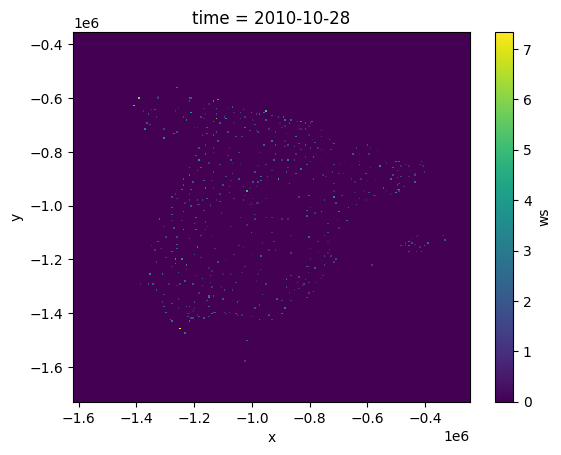

In [26]:
ds_cleaned['ws'].isel(time=300).plot()

In [27]:
print("ws_data shape: ", ws_data.shape)
print("mask shape: ", ws_mask.shape)

ws_data shape:  (4748, 250, 250)
mask shape:  (4748, 250, 250)


In [28]:
print("Zero ws_data: ", (ds_cleaned["ws"] == 0).sum().item())
print("Zero mask: ", (ws_mask == 0).sum().item())

Zero ws_data:  294001983
Zero mask:  293988296


#### Save the data and mask 

In [31]:
name_outfile_data = 'cleaned_aemet_daily-wind_m_s_2010-2022_CERRA.nc'
name_outfile_mask = 'mask_aemet_daily-wind_2010-2022_CERRA.nc'

ds_cleaned.to_netcdf(path + path_out + name_outfile_data)
Mask.to_netcdf(path + path_out + name_outfile_mask)


In [34]:
print(ds_cleaned)

<xarray.Dataset> Size: 1GB
Dimensions:  (time: 4748, y: 250, x: 250)
Coordinates:
  * time     (time) datetime64[ns] 38kB 2010-01-01 2010-01-02 ... 2022-12-31
  * y        (y) float64 2kB -1.727e+06 -1.722e+06 ... -3.63e+05 -3.575e+05
  * x        (x) float64 2kB -1.617e+06 -1.612e+06 ... -2.53e+05 -2.475e+05
Data variables:
    ws       (time, y, x) float32 1GB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0


In [35]:
print(Mask)

<xarray.Dataset> Size: 1GB
Dimensions:  (time: 4748, y: 250, x: 250)
Coordinates:
  * time     (time) datetime64[ns] 38kB 2010-01-01 2010-01-02 ... 2022-12-31
  * y        (y) float64 2kB -1.727e+06 -1.722e+06 ... -3.63e+05 -3.575e+05
  * x        (x) float64 2kB -1.617e+06 -1.612e+06 ... -2.53e+05 -2.475e+05
Data variables:
    mask     (time, y, x) float32 1GB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
